The Data Intelligence Team is searching for a new top analyst. We already know of an excellent candidate with top analytical and programming skills. Unfortunately, we
don’t know her exact whereabouts but we only have some vague information where she might be. Can you tell us where to best send our recruiters and plot an easy to read map
of your solution for them?

This is what we could extract from independent sources:
- The candidate is likely to be close to the river Spree. The probability at any point is given by a Gaussian function of its shortest distance to the river. The function peaks at zero and
has 95% of its total integral within +/-2730m.
- A probability distribution centered around the Brandenburg Gate also informs us of the candidate’s location. The distribution’s radial profile is log-normal with a mean of
4700mand amode of 3877min every direction.
- A satellite offers further information: with 95% probability she is located within 2400m distance of the satellite’s path (assuming a normal probability distribution).
Please make use of the additional information in the file http://bit.ly/19fdgVa.

Provide the GPS coordinates of the next Top Analyst as part of your application. In addition, you can send us your code and some visualizations.

Coordinates

Earth radius:
6371km

Brandenburg Gate GPS coordinates

52.516288,13.377689

Satellite path is a great circle path between coordinates

52.590117,13.39915

52.437385,13.553989

River Spree can be approximated as piecewise linear between the following coordinates:
52.529198,13.274099
52.531835,13.29234
52.522116,13.298541
52.520569,13.317349
52.524877,13.322434
52.522788,13.329
52.517056,13.332075
52.522514,13.340743
52.517239,13.356665
52.523063,13.372158
52.519198,13.379453
52.522462,13.392328
52.520921,13.399703
52.515333,13.406054
52.514863,13.416354
52.506034,13.435923
52.496473,13.461587
52.487641,13.483216
52.488739,13.491456
52.464011,13.503386

Tip for conversion of coordinates

You can (but don’t have to) use following simple projection for getting GPS coordinates into an orthogonal coordinate system. The projection is reasonably accurate for the Berlin area.

Result is an XY coordinate system with the origin (0,0) at the South-West corner of the area we are interested in. The X axis corresponds to East-West and is given in kilometres. The Y axis corresponds to North-South and is also given in kilometres.

South-west corner of the area we are interested in:
SW_lat = 52.464011 (Latitude)
SW_lon = 13.274099 (Longitude)

The x and y coordinates of a GPS coordinate P with (P_lat, P_lon) can be calculated using:
P_x = (P_lon − SW_lon) ∗ cos(SW_lat * pi / 180) ∗ 111.323
P_y = (P_lat − SW_lat) ∗ 111.323


## REFERENCES

-Approximating a circle with Bezier curves: http://www.tinaja.com/glib/ellipse4.pdf
-Fitting a circle to a set of points through least squares: http://scipy-cookbook.readthedocs.io/items/Least_Squares_Circle.html

In [18]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import math
from scipy.stats import norm
from matplotlib.colors import LogNorm  # numpy.random.lognormal(mean=0.0, sigma=1.0, size=None)
from numpy.random import randn

# South-west corner of the area we are interested in: 
SW_lat = 52.464011 # (Latitude) 
SW_lon = 13.274099 #(Longitude)

def GPS2XYcoords(P_lat, P_lon):
    # The x and y coordinates of a GPS coordinate P with (P_lat, P_lon) can be calculated using: 
    Px = (P_lon - SW_lon) * np.cos(SW_lat * np.pi / 180) *111.323 
    Py = (P_lat - SW_lat) * 111.323
    #print "X,Y coords: ", Px, Py
    df = pd.DataFrame({'x':[Px], 'y':[Py]})#, index='x')
    df.plot('x', 'y', kind='scatter')
    return df

def interpolate1D(x, y):
    from scipy.interpolate import interp1d
    f = interp1d(x, y)
    #f2 = interp1d(x, y, kind='cubic')
    xnew = np.linspace(x.min(), x.max(),num=len(x), endpoint=True) 
    plt.plot(x, y, 'o', xnew, f(xnew), '-')#, xnew, f2(xnew), '--')
    plt.legend(['data', 'linear', 'cubic'], loc='best')
    plt.show()
    
def draw_River_Spree():
    GPS = pd.read_csv('./RiverSpreeGPS.csv')
    GPS.columns = ['x','y']
    interpolate1D(GPS.x, GPS.y)
    return GPS
  
def draw_log_normal_pdf_around_Brandenburg_gate():
    """
    A probability distribution centered around the Brandenburg Gate also informs us of the
    candidate’s location. The distribution’s radial profile is log-normal with a mean of
    4700m and amode of 3877m in every direction. WHAT DOES IT MEAN?
    TODO: use colormap normalization: http://matplotlib.org/users/colormapnorms.html
    """
    g = GPS2XYcoords(52.516288,13.377689)
    mu = 4700
    mode = 3877

    #     #normal distribution center at x=0 and y=5
    #     x = randn(100000)     #     y = randn(100000)+5
    H, xedges, yedges, img = plt.hist2d(g.x, g.y, norm=LogNorm(mu))
#     fig = plt.figure()
#     plt.show()
    #print H, xedges
    print "Radial LogNormal drawn!"
    return xedges, yedges
    
def draw_circle(x, y, r, color):
    # Circle takes (x,y) coordinates of the circle's center, and radius r
    circle = plt.Circle((x,y), r, color=color, fill=False, clip_on=False) #  make a circle with no fill
    # Add that artist to an instance of axes:
#    fig, ax = plt.subplots()
#     ax.add_artist(circle)
#     plt.show()

#     b) X, Y = np.meshgrid(x,y)
#     F = X**2 + Y**2 - 0.6
#     plt.contour(X,Y,F,[0])
#     plt.show()
    print "Circle drawn!"
    return circle

def draw_Satellite_path():
    """
    TODO: generalize for more than 2 points with Least Squares Circle: 
    http://scipy-cookbook.readthedocs.io/items/Least_Squares_Circle.html
    A satellite offers further information: with 95% probability she is located within 2400m
    distance of the satellite’s path (assuming a normal probability distribution).
    Satellite path is a great circle path between coordinates:
    """
    x, y = 52.590117,13.39915
    x1,y1 = 52.437385,13.553989
    """
    SE = stdev(x)/sqrt(N)
    If the underlying distribution of the coefficients is normal, the 95% confidence interval is 
    [mean-2*sigma,mean+2*sigma], so the standard deviation is 1/4 the width of the interval. See [1]     
    """
    if x>x1:
        center_x = x1+(x-x1)/2
    else:
        center_x = x+ (x1-x)/2
    if y>y1:
        center_y = y1+(y-y1)/2
    else:
        center_y = y+ (y1-y)/2
    radius = math.sqrt((x - center_x)**2 + (y - center_y)**2)
    print "Satellite path drawn!"
    satellite_path = draw_circle(center_x, center_y, radius, 'r')
    outer = draw_circle(center_x, center_y, radius+2400, 'g')
    inner = draw_circle(center_x, center_y, radius-2400, 'b')
    return outer, satellite_path, inner

def distance_to_river(x,y, river_funct):
    # returns shortest distance to the river
    # river contains the coordinates (x,y) of the river
    return 1

def cartesian2polar(theta):
    # cartesian coordinates to polar ones.
    # theta goes from 0 to 2pi:     theta = np.linspace(0, 2*np.pi, 100)
    x1 = r*cos(theta)
    x2 = r*sin(theta)
    # if you use these substitions in the circle equation you will see that r=sqrt(0.6).
    return x1, x2
    
def gaussian(d, x_range_left, x_range_right, mu, sigma):
    """
     A*np.exp(-(x-mu)**2/(2.*sigma**2))
    """
    # http://yaboolog.blogspot.com.es/2011/07/python-tips-draw-gaussian-pdf-graph.html
    # Plot between -10 and 10 with .001 steps.
    print "Plotting Gaussian from ", x_range_left, x_range_right
    x_axis = np.arange(x_range_left, x_range_right, 0.001)
    gaussian = norm.pdf(x_axis, mu, sigma)
    fig = plt.plot(x_axis, gaussian) # pdf(axis_range, mu, sigma)
    plt.show()
#     rv = norm()
#     ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
    #fig.savefig('LogNorm centered around gate.png')
    return x_axis, gaussian   
    
def gaussian_of_shortest_dist_to_river(x, y, river_funct):
    """
    The candidate is likely to be close to the river Spree. The probability at any point is given
    by a Gaussian function of its shortest distance to the river. The function peaks at zero and
    has 95% of its total integral within +/-2730m.
    """
    d = distance_to_river(x,y,river_funct)
    sigma = 2730/2
    return gaussian(river.x.min(), river.x.max(), 0, sigma)

def draw_map():
    """
    Draws all areas of interest in the map
    TODO: use colormap with sentinels: 
    https://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Plotting_Images_with_Special_Values.html 
    
    """
    #fig = plt.figure()
    fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
    # (or if you have an existing figure)
    # fig = plt.gcf()
    # ax = fig.gca()


    # change default range so that new circles will work
#     ax.set_xlim((0, 10))
#     ax.set_ylim((0, 10))
    #some data
#     ax.plot(range(11), 'o', color='black')
#     # key data point that we are encircling
#     ax.plot((5), (5), 'o', color='y')

        
    # Draw satellite path
    outer, satellite_path, inner = draw_Satellite_path()
    #ax.add_artist(outer)
    ax.add_artist(satellite_path)
    #ax.add_artist(inner)
    plt.show()
    
    # Draw Radial LogNormal around Brandenburg Gate
    gate_x, gate_y = draw_log_normal_pdf_around_Brandenburg_gate()
    #ax.plot(gate_x, gate_y, '+', color='g')      #scatterplot(gate_x, gate_y)
    
    # Draw Gaussian of the shortest distance to the river
    river = draw_River_Spree()     #ax.add_artist(river)
    
    print "Full map drawn!"
    plt.show()
    #fig.savefig('map.png')


draw_map()

Satellite path drawn!
Circle drawn!
Circle drawn!
Circle drawn!


Radial LogNormal drawn!


ValueError: minvalue must be less than or equal to maxvalue

Full map drawn!


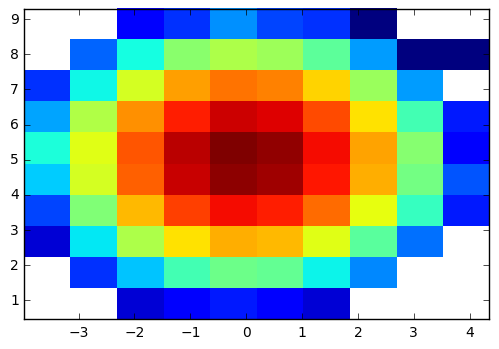

In [2]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
from numpy.random import randn

#normal distribution center at x=0 and y=5
x = randn(100000)
y = randn(100000)+5

H, xedges, yedges, img = plt.hist2d(x, y, norm=LogNorm())
fig = plt.figure()
#extent = [yedges[0], yedges[-1], xedges[0], xedges[-1]]
# ax = fig.add_subplot(1, 1, 1)
# im = ax.imshow(H, cmap=plt.cm.jet, extent=extent, norm=LogNorm())
# fig.colorbar(im, ax=ax)
plt.show()


REFERENCES

[1] SD = sqrt(N)(upper limit-lower limit)/3.92   for a 95% CI if the sample size is large (>100.e.g in each group)
    http://handbook.cochrane.org/chapter_7/7_7_3_2_obtaining_standard_deviations_from_standard_errors_and.htm
    Todo: norminv(0.975)*sigma=1.9600*sigma
        
        

In [3]:
"""
Given 3 points, fit circle:
x, y, z = 0+1j, 1+0j, 0-1j
w = z-x
w /= y-x
c = (x-y)*(w-abs(w)**2)/2j/w.imag-x
print '(x%+.3f)^2+(y%+.3f)^2 = %.3f^2' % (c.real, c.imag, abs(c+x))





    #ax = plt.gca() # empty plot grid
    ax.cla() # clear things for fresh plot
    
    SE = stdev(x)/sqrt(N)
    The standard error of the mean (SE of the mean) estimates the variability between sample means that you would obtain if you took multiple samples from the same population. The standard error of the mean estimates the variability between samples whereas the standard deviation measures the variability within a single sample.
    
    
    
    
    
    #fig = plt.figure()
    fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
    # (or if you have an existing figure)
    # fig = plt.gcf()
    # ax = fig.gca()


    # change default range so that new circles will work
#     ax.set_xlim((0, 10))
#     ax.set_ylim((0, 10))
    # some data
#     ax.plot(range(11), 'o', color='black')
#     # key data point that we are encircling
#     ax.plot((5), (5), 'o', color='y')

#     gate_x, gate_y = log_normal_pdf_around_Brandenburg_gate()
#     ax.plot(gate_x, gate_y, '+', color='g')
"""



"\nGiven 3 points, fit circle:\nx, y, z = 0+1j, 1+0j, 0-1j\nw = z-x\nw /= y-x\nc = (x-y)*(w-abs(w)**2)/2j/w.imag-x\nprint '(x%+.3f)^2+(y%+.3f)^2 = %.3f^2' % (c.real, c.imag, abs(c+x))\n\n\n\n\n\n    #ax = plt.gca() # empty plot grid\n    ax.cla() # clear things for fresh plot\n    \n    SE = stdev(x)/sqrt(N)\n    The standard error of the mean (SE of the mean) estimates the variability between sample means that you would obtain if you took multiple samples from the same population. The standard error of the mean estimates the variability between samples whereas the standard deviation measures the variability within a single sample.\n    \n    \n    \n    \n    \n    #fig = plt.figure()\n    fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot\n    # (or if you have an existing figure)\n    # fig = plt.gcf()\n    # ax = fig.gca()\n\n\n    # change default range so that new circles will work\n#     ax.set_xlim((0, 10))\n#     ax.set_ylim((0, 10))\n    # some data\n# 

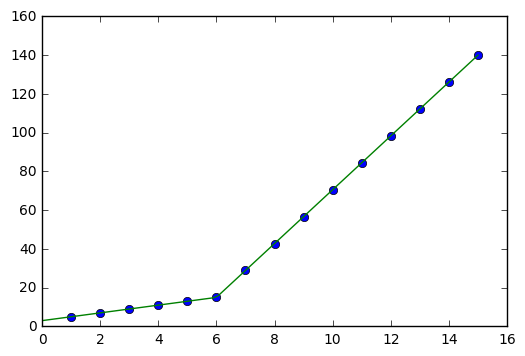

In [4]:
from scipy import optimize

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ,11, 12, 13, 14, 15], dtype=float)
y = np.array([5, 7, 9, 11, 13, 15, 28.92, 42.81, 56.7, 70.59, 84.47, 98.36, 112.25, 126.14, 140.03])

def piecewise_linear(x, x0, y0, k1, k2):
    return np.piecewise(x, [x < x0], [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0])

p , e = optimize.curve_fit(piecewise_linear, x, y)
xd = np.linspace(0, 15, 100)
plt.plot(x, y, "o")
plt.plot(xd, piecewise_linear(xd, *p))
plt.show()

The minimum distance is 0.86
dot(v1, v2) =  0.000336477214214


(-2.0, 2.5, 0.0, 4.5)

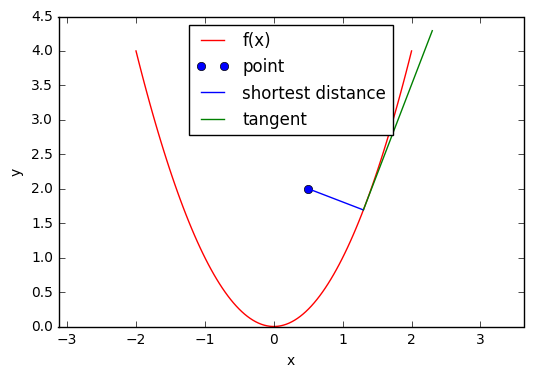

In [5]:
from scipy.optimize import fmin_cobyla

P = (0.5, 2)

def f(x):
    return x**2

def objective(X):
    x,y = X
    return np.sqrt((x - P[0])**2 + (y - P[1])**2)

def c1(X):
    x,y = X
    return f(x) - y

X = fmin_cobyla(objective, x0=[0.5,0.5], cons=[c1])

print 'The minimum distance is {0:1.2f}'.format(objective(X))

# Verify the vector to this point is normal to the tangent of the curve
# position vector from curve to point
v1 = np.array(P) - np.array(X)
# position vector
v2 = np.array([1, 2.0 * X[0]])
print 'dot(v1, v2) = ',np.dot(v1, v2)

x = np.linspace(-2, 2, 100)

plt.plot(x, f(x), 'r-', label='f(x)')
plt.plot(P[0], P[1], 'bo', label='point')
plt.plot([P[0], X[0]], [P[1], X[1]], 'b-', label='shortest distance')
plt.plot([X[0], X[0] + 1], [X[1], X[1] + 2.0 * X[0]], 'g-', label='tangent')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()
plt.savefig('MinDistToFunction.png')

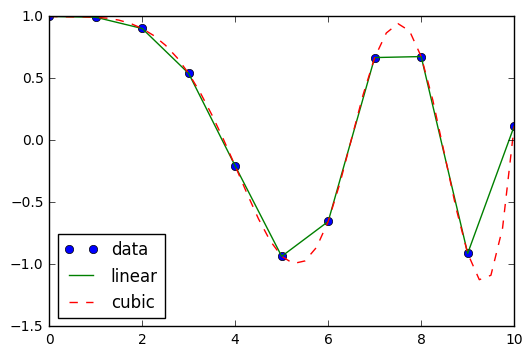

In [17]:
def interpolate1D_lin_cubic(x, y):
    from scipy.interpolate import interp1d
    x = np.linspace(0, 10, num=11, endpoint=True)
    y = np.cos(-x**2/9.0)
    f = interp1d(x, y)
    f2 = interp1d(x, y, kind='cubic')
    xnew = np.linspace(0, 10, num=41, endpoint=True)
    plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
    plt.legend(['data', 'linear', 'cubic'], loc='best')
    plt.show()
    
interpolate1D_lin_cubic([], [])

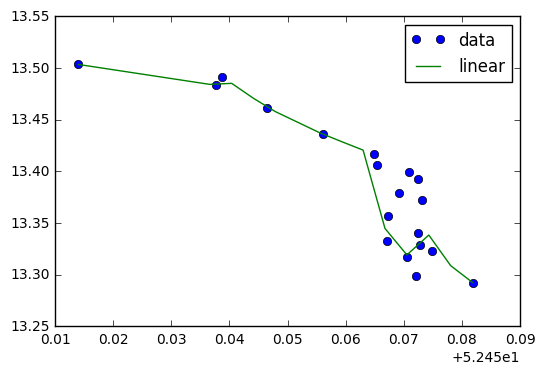

,x,y
0,52.531835,13.292340
1,52.522116,13.298541
2,52.520569,13.317349
3,52.524877,13.322434
4,52.522788,13.329000
5,52.517056,13.332075
6,52.522514,13.340743
7,52.517239,13.356665
8,52.523063,13.372158
9,52.519198,13.379453


In [19]:
draw_River_Spree()